In [1]:
%load_ext sppl.magics
%matplotlib inline

In [2]:
import os
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

from matplotlib.ticker import MultipleLocator
from numpy.ma import masked_invalid
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

from sppl.magics.render import render_graphviz
from sppl.dnf import dnf_to_disjoint_union

In [3]:
%%sppl minimal
X ~= norm(loc=0, scale=2)
Y ~= 0.6*norm(loc=8, scale=1) | 0.4*gamma(loc=-3, a=3)

In [4]:
n = %sppl_get_namespace minimal

In [5]:
# Condition the model on an event.
e0 = ((-4 < n.X) < 4) & ((1 < n.Y**2) < 4)
e1 = ((-1 < n.X) < 1) & ((-1.5 < n.Y) < 6)
modelc = n.minimal.condition(e0 | e1)

In [6]:
# Show the disjoint components of the event.
e =  dnf_to_disjoint_union(e0 | e1)
print(e)
print([n.minimal.prob(x) for x in e.subexprs])

(((-4 < X) < 4) & ((-2 < Y) < -1)) | (((-4 < X) < 4) & ((1 < Y) < 2)) | (((-1 < X) < 1) & ((-1 <= Y) <= 1)) | (((-1 < X) < 1) & ((2 <= Y) < 6))
[0.09278584524638006, 0.04331568961023601, 0.06717622976807626, 0.023365316112895024]


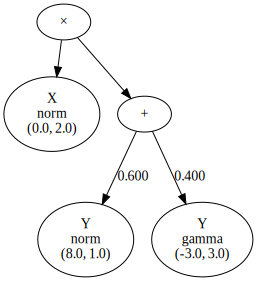

In [7]:
# Plot the prior SPN.
%sppl_to_graph minimal

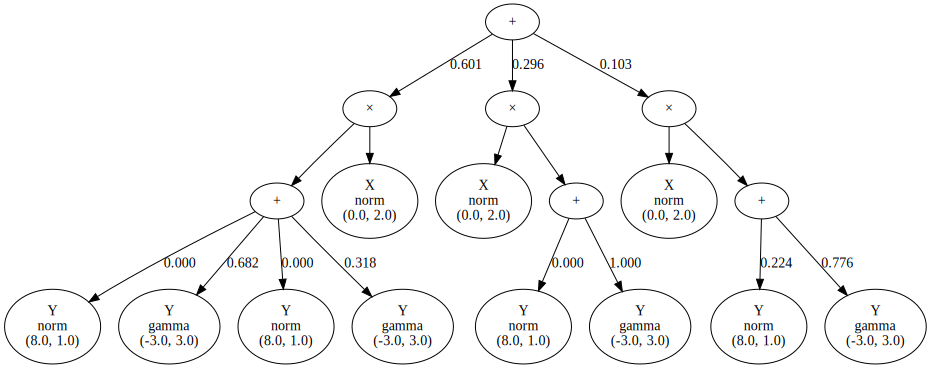

In [8]:
# Plot the posterior SPN.
%sppl_to_graph modelc

#### Visualize the prior and posterior density surfaces

In [9]:
def get_probs(xs, ys, model):
    return [model.pdf({n.X: x, n.Y: y}) for x in xs for y in ys]

In [10]:
xs = np.linspace(-4.5, 4.5, 70)
ys = np.linspace(-3, 11, 70)
xx, yy = np.meshgrid(xs, ys)

In [11]:
p_prior = get_probs(xs, ys, n.minimal)
p_posterior = get_probs(xs, ys, modelc)

In [12]:
cmap = cm.viridis_r

In [13]:
def plot_2d(ax, xs, ys, zs):
    xx, yy = np.meshgrid(xs, ys, indexing='ij')
    zz = np.reshape(zs, (len(xs), len(ys)))
    pcm = ax.pcolormesh(xx, yy, zz, cmap=cmap, shading='auto')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

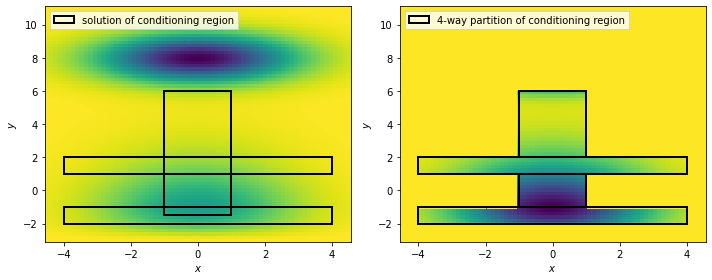

In [14]:
fig, axes = plt.subplots(ncols=2)
plot_2d(axes[0], xs, ys, p_prior)
plot_2d(axes[1], xs, ys, p_posterior)
fig.set_size_inches(10, 5)

# ((-4 < X < 4) & (-2 < Y < -1)) |
# ((-4 < X < 4) & (1 < Y < 2)) |
# ((-1 < X < 1) & (-1 < Y <= 1))
# | ((-1 < X < 1) & (2 <= Y < 5))

c = 'k'
axes[0].add_patch(Rectangle((-4, -2), 8, 1, fill=False, color=c, linewidth=2))
axes[0].add_patch(Rectangle((-4, 1), 8, 1, fill=False, color=c, linewidth=2))
axes[0].add_patch(Rectangle((-1, -1.5), 2, 7.5, fill=False, color=c, linewidth=2,
    label='solution of conditioning region'))
axes[0].legend(loc='upper left', fancybox=False)

axes[1].add_patch(Rectangle((-4, -2), 8, 1, fill=False, color=c, linewidth=2))
axes[1].add_patch(Rectangle((-4, 1), 8, 1, fill=False, color=c, linewidth=2))
axes[1].add_patch(Rectangle((-1, -1), 2, 2, fill=False, color=c, linewidth=2))
axes[1].add_patch(Rectangle((-1, 2), 2, 4, fill=False, color=c, linewidth=2,
    label='4-way partition of conditioning region'))
axes[1].legend(loc='upper left', fancybox=False)

fig.set_size_inches(10, 4)
fig.set_tight_layout(True)

In [15]:
def plot_3dd(ax, xs, ys, zs):
    xx, yy = np.meshgrid(xs, ys, indexing='ij')
    zz = np.reshape(zs, (len(xs), len(ys)))
    ax.plot_surface(xx, yy, zz, cmap=cm.viridis_r)
    ax.contour(xx, yy, zz, zdir='z', offset=-0.10, linewidths=.5, levels=np.arange(0, 0.11, 0.005))
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

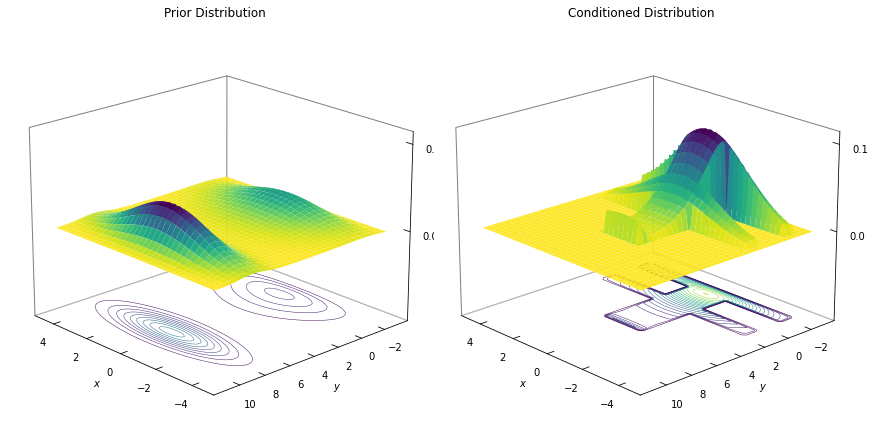

In [16]:
fig = plt.figure()
axes = [
    fig.add_subplot(121, projection='3d'),
    fig.add_subplot(122, projection='3d')
]
plot_3dd(axes[0], xs, ys, p_prior)
plot_3dd(axes[1], xs, ys, p_posterior)

for ax in axes:
    ax.set_zlim([-0.10, 0.11])
    ax.set_zticks([0, 0.10])
    ax.view_init(azim=137, elev=20)
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('k')
    ax.yaxis.pane.set_edgecolor('k')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    
axes[0].set_title('Prior Distribution')
axes[1].set_title('Conditioned Distribution')

fig.set_size_inches(12, 8)
fig.set_tight_layout(True)